In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras as kr
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.datasets import mnist
from keras.utils import np_utils

import talos

import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [13]:
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,kernel_initializer='uniform',activation='tanh'))
model.add(Dense(num_classes,kernel_initializer='uniform',activation='softmax'))

model.compile(loss=kr.losses.CategoricalCrossentropy(), optimizer='sgd', metrics=['categorical_accuracy'])
sgd = optimizers.SGD(learning_rate=0.0001)

Epoch 1/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.8509 - categorical_accuracy: 0.7782 - val_loss: 0.2633 - val_categorical_accuracy: 0.9252
Epoch 2/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.2695 - categorical_accuracy: 0.9208 - val_loss: 0.1642 - val_categorical_accuracy: 0.9525
Epoch 3/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.1870 - categorical_accuracy: 0.9452 - val_loss: 0.1266 - val_categorical_accuracy: 0.9638
Epoch 4/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.1421 - categorical_accuracy: 0.9584 - val_loss: 0.1031 - val_categorical_accuracy: 0.9707
Epoch 5/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.1137 - categorical_accuracy: 0.9667 - val_loss: 0.0940 - val_categorical_accuracy: 0.9735


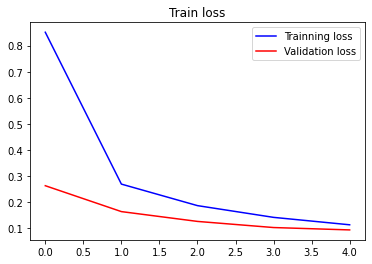

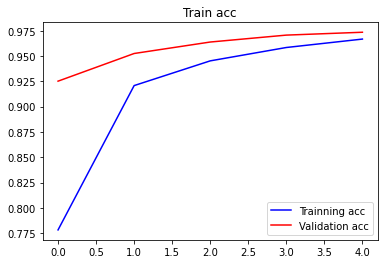

NameError: name 'test_x' is not defined

In [14]:
b = 16
train_history=model.fit(X_train,
                        y_train,
                        epochs=5,
                        validation_data=(X_test, y_train),
                        batch_size=b)

loss=train_history.history['loss']
acc=train_history.history['categorical_accuracy']
epochs=range(0,len(loss))
plt.title("Train loss")
plt.plot(epochs,loss,'b',label='Trainning loss')
val_loss=train_history.history['val_loss']
val_acc=train_history.history['val_categorical_accuracy']
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend(loc='best')
plt.figure()
plt.title("Train acc")
plt.plot(epochs,acc,'b',label='Trainning acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend(loc='best')
plt.show()

scores=model.evaluate(X_test,y_train,batch_size=b)

In [10]:
def model_minst(train_x, train_y, test_x, test_y, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=train_x.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(params['second_neuron'],kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(params['thrid_neuron'],kernel_initializer='uniform',activation='relu'))
    model.add(Dense(num_classes,kernel_initializer='uniform',activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy', talos.utils.metrics.f1score])
    sgd = optimizers.SGD(learning_rate=params['lr'])

    train_history=model.fit(train_x,
                            train_y,epochs=params['epochs'],
                            validation_data=(test_x, test_y),
                            batch_size=params['batch_size'])

    return train_history, model 

In [11]:
p = {'first_neuron': [1024, 2048],
     'second_neuron': [128, 256],
     'thrid_neuron':[0, 128],
     'dropout': [0, .2, .5],
     'lr':[.02, .01, .001, .0001],
     'epochs': [20, 50],
     'batch_size': [32, 64, 96, 128]
     }

In [12]:
out = talos.Scan(x=X_train, y=y_train, x_val=X_test, y_val=y_test, model=model_minst, params=p, experiment_name='minst_model_try') 

Epoch 1/10
7/7 [==============================] - 2s 206ms/step - loss: 1.9188 - acc: 0.4902 - f1score: 0.3630 - val_loss: 1.3697 - val_acc: 0.5000 - val_f1score: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 1s 179ms/step - loss: 1.2698 - acc: 0.4804 - f1score: 0.3032 - val_loss: 1.3435 - val_acc: 0.5000 - val_f1score: 0.1250
Epoch 3/10
7/7 [==============================] - 1s 182ms/step - loss: 1.1735 - acc: 0.5392 - f1score: 0.4025 - val_loss: 1.3558 - val_acc: 0.5000 - val_f1score: 0.5000
Epoch 4/10
7/7 [==============================] - 1s 180ms/step - loss: 1.2029 - acc: 0.5490 - f1score: 0.3757 - val_loss: 1.5638 - val_acc: 0.5000 - val_f1score: 0.5000
Epoch 5/10
7/7 [==============================] - 1s 178ms/step - loss: 1.1732 - acc: 0.5588 - f1score: 0.4229 - val_loss: 1.4142 - val_acc: 0.5000 - val_f1score: 0.5000
Epoch 6/10
7/7 [==============================] - 1s 177ms/step - loss: 1.1140 - acc: 0.5294 - f1score: 0.3867 - val_loss: 1.3360 - val_acc: 0.500

Epoch 1/10
7/7 [==============================] - 2s 201ms/step - loss: 2.3910 - acc: 0.4216 - f1score: 0.2980 - val_loss: 1.2896 - val_acc: 0.5000 - val_f1score: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 1s 176ms/step - loss: 1.2632 - acc: 0.5294 - f1score: 0.3408 - val_loss: 1.1878 - val_acc: 0.5000 - val_f1score: 0.1538
Epoch 3/10
7/7 [==============================] - 1s 174ms/step - loss: 1.1857 - acc: 0.5392 - f1score: 0.3869 - val_loss: 1.3968 - val_acc: 0.2500 - val_f1score: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 1s 192ms/step - loss: 1.3227 - acc: 0.4804 - f1score: 0.1940 - val_loss: 1.3446 - val_acc: 0.3333 - val_f1score: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 1s 171ms/step - loss: 1.2014 - acc: 0.5392 - f1score: 0.2492 - val_loss: 1.3034 - val_acc: 0.5000 - val_f1score: 0.1538
Epoch 6/10
7/7 [==============================] - 1s 177ms/step - loss: 1.1571 - acc: 0.5196 - f1score: 0.4141 - val_loss: 1.3393 - val_ac

100%|██████████| 2/2 [00:28<00:00, 14.01s/it]


In [51]:
hyperp = out.data
hyperp.to_csv('/root/work/data/hyp_mnist.csv')
